# Libraries

In [1]:
import numpy as np
import seaborn as sns
from pprint import pprint
from mlpocket.tabular import *

# Data

### Loading

In [2]:
_, _, train = load_data(path="../data/raw/titanic/train.csv", labels=["Survived"])
test = load_data(path="../data/raw/titanic/test.csv")

### Visualization

##### NaN statistics

In [3]:
get_nan_stats(train)

##### Data distributions

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
131,132,0,3,20.0,0,0,7.0500
474,475,0,3,22.0,0,0,9.8375
84,85,1,2,17.0,0,0,10.5000
489,490,1,3,9.0,1,1,15.9000
436,437,0,3,21.0,2,2,34.3750
...,...,...,...,...,...,...,...
396,397,0,3,31.0,0,0,7.8542
372,373,0,3,19.0,0,0,8.0500
82,83,1,3,NaN,0,0,7.7875
428,429,0,3,NaN,0,0,7.7500


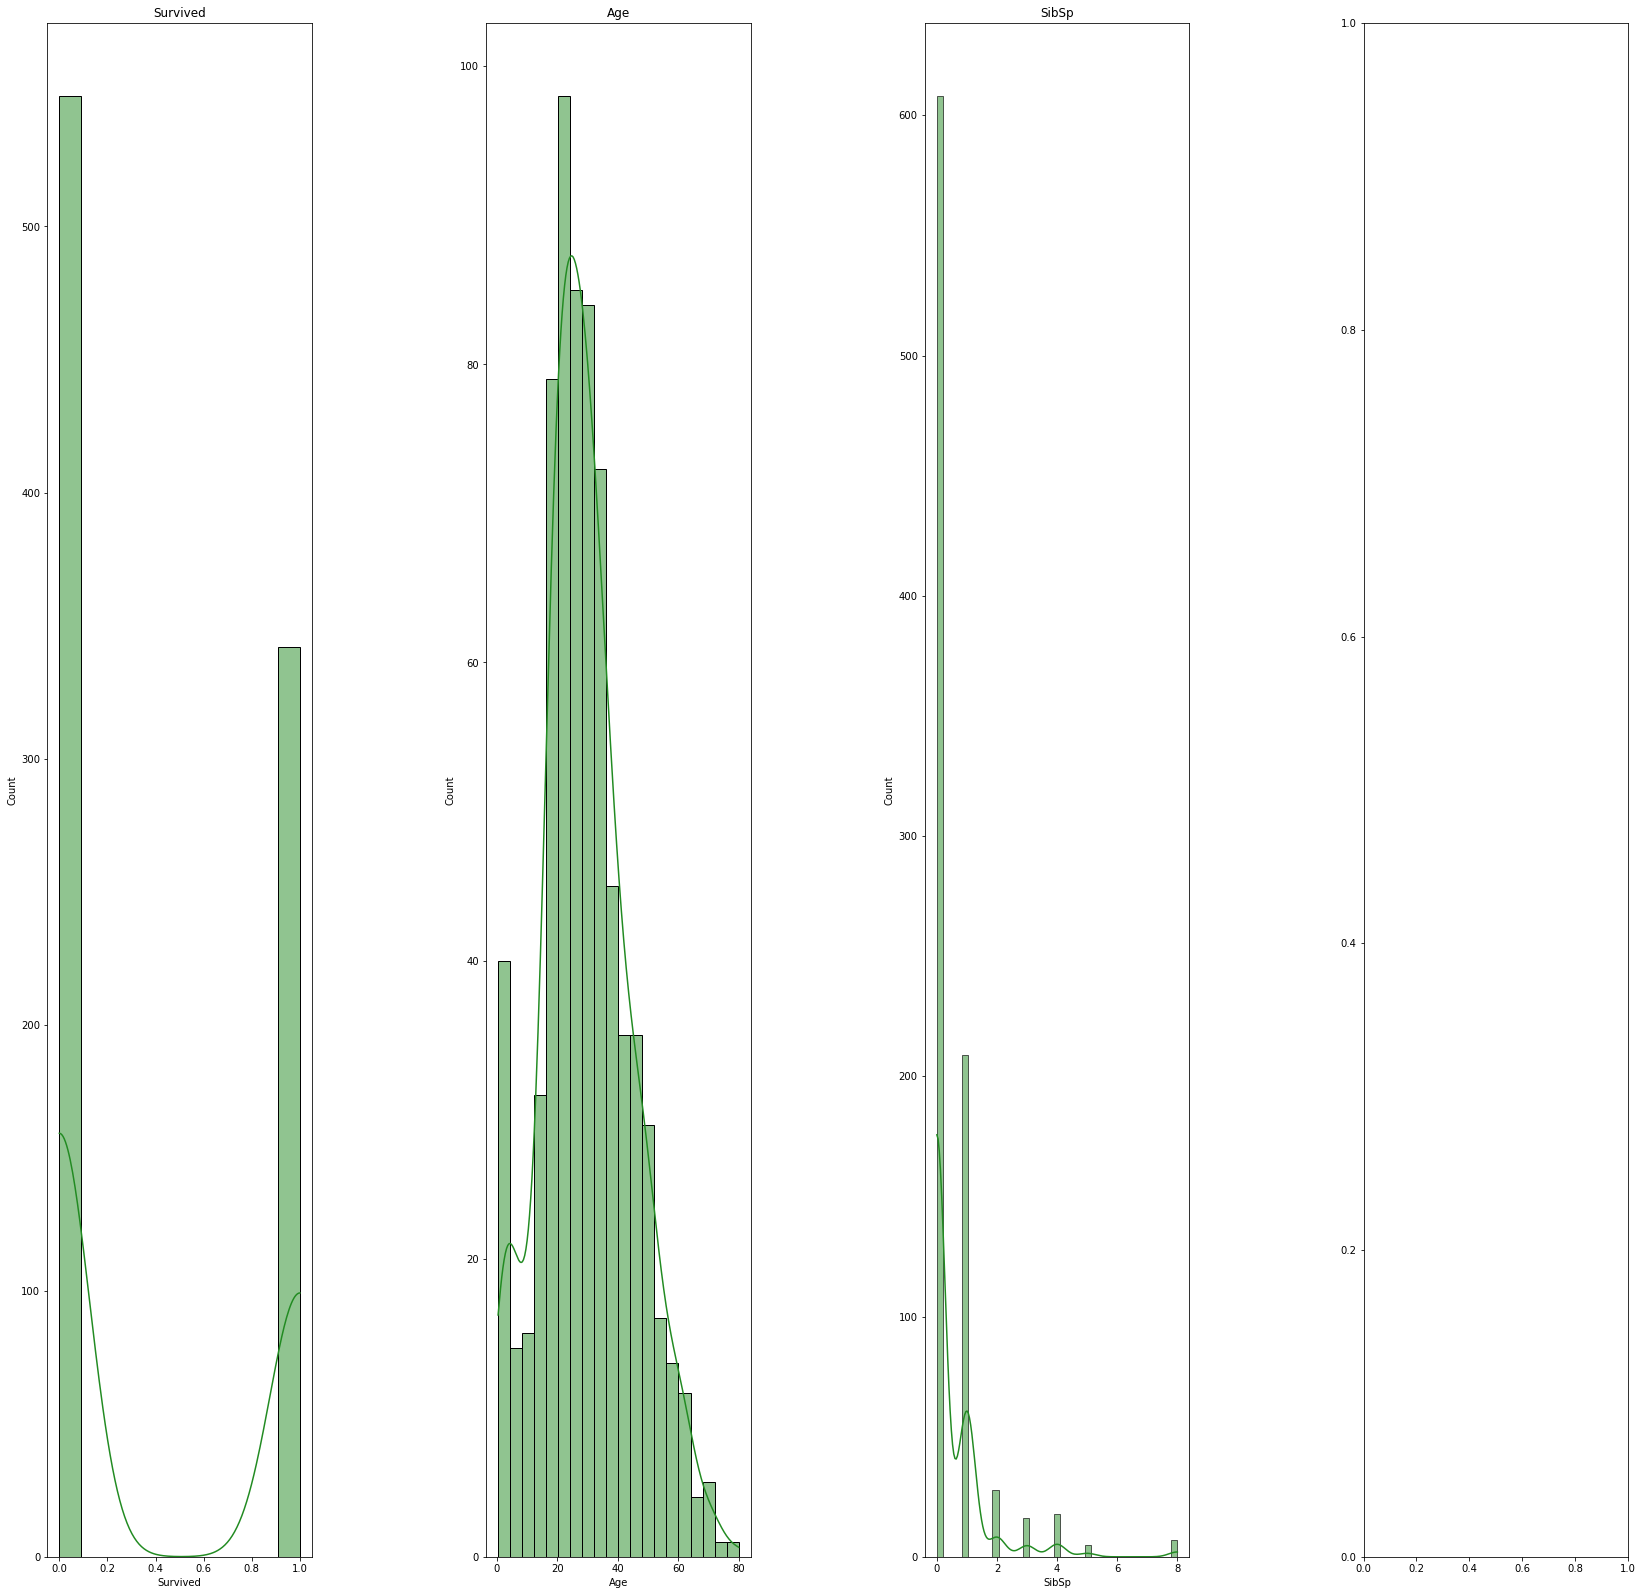

In [4]:
plot_columns_dist(train, columns = ["Age", "Survived", "SibSp"])

##### Correlation of values

<AxesSubplot:>

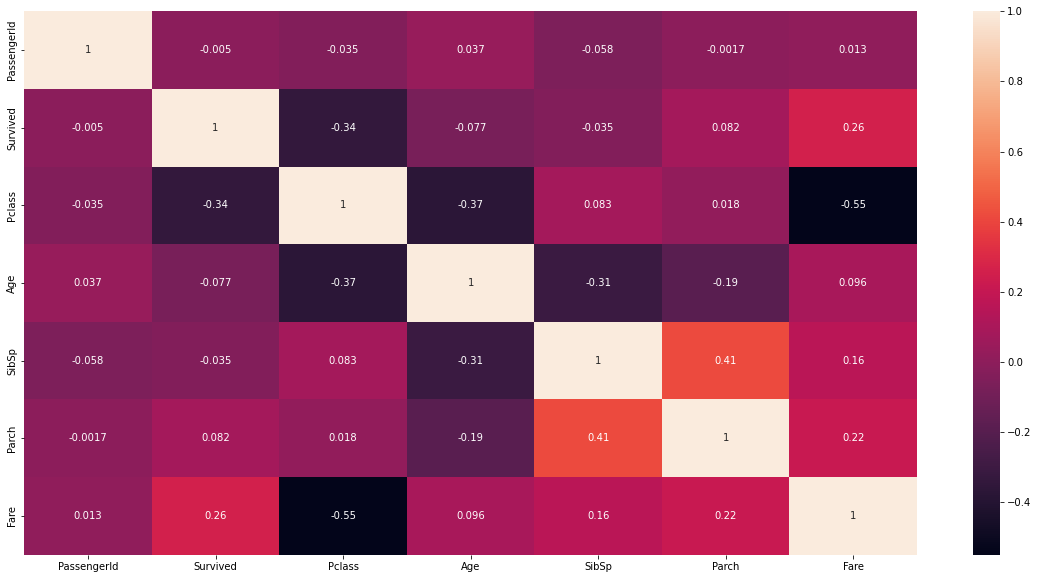

In [5]:
plot_corr(train)

#### Class Imbalance

In [6]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

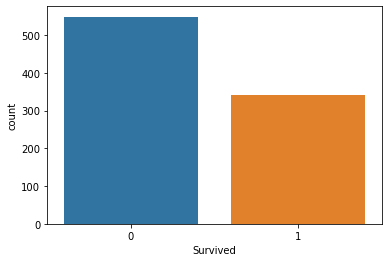

In [7]:
sns.countplot(x=train['Survived'])

#### Features

###### Sex

In [8]:
pprint(conditional_probabilities(train, 'Survived', 'Sex'))

{0: {'female': 0.14754098360655737, 'male': 0.8524590163934426},
 1: {'female': 0.6812865497076024, 'male': 0.31871345029239767}}


<AxesSubplot:xlabel='Sex', ylabel='count'>

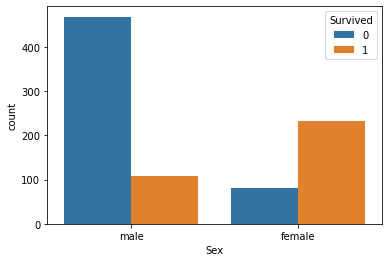

In [9]:
sns.countplot(x=train['Sex'], hue=train['Survived'])

##### Pclass

In [10]:
pprint(conditional_probabilities(train, 'Survived', 'Pclass'))

{0: {1: 0.14571948998178508, 2: 0.1766848816029144, 3: 0.6775956284153005},
 1: {1: 0.39766081871345027, 2: 0.2543859649122807, 3: 0.347953216374269}}


<AxesSubplot:xlabel='Pclass', ylabel='count'>

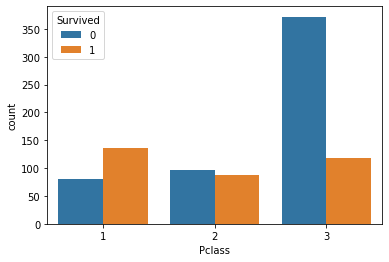

In [11]:
sns.countplot(x=train['Pclass'], hue=train['Survived'])

In [12]:
pprint(conditional_probabilities(train, 'Pclass', 'Survived'))

{1: {0: 0.37037037037037035, 1: 0.6296296296296297},
 2: {0: 0.5271739130434783, 1: 0.47282608695652173},
 3: {0: 0.7576374745417516, 1: 0.24236252545824846}}


##### Age

In [13]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [14]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [15]:
pd.qcut(train['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

###### SibSp

In [16]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

##### Parch

In [17]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [18]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Note: when we have two weak predictors, we can combine them to get stronger predicter.

```SibSp``` + ```Parch``` = ```FamilySize```

##### Ticket

In [19]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

Note: Type of tickets determines the room they probably resided in during the wreck and therefore their chance to escape from the room

##### Fare

In [20]:
pd.qcut(train['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [21]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

In [22]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


##### Embarked

In [23]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [25]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

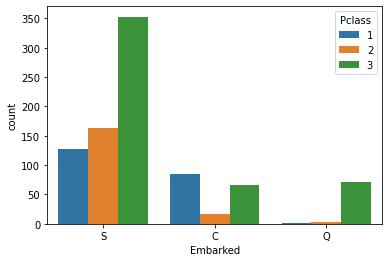

In [26]:
sns.countplot(x=train['Embarked'], hue=train['Pclass'])

### Preprocessing

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Names

1. Extract length

In [28]:
train = to_length(train, 'Name', 'Name_Len', False)
test = to_length(test, 'Name', 'Name_Len', False)

2. Extract title

In [29]:
train = to(train, 'Name', 'Name_Title', lambda x: (x.split(',')[1]).split()[0], True)
test = to(test, 'Name', 'Name_Title', lambda x: (x.split(',')[1]).split()[0], True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len,Name_Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,51,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,44,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,24,Mr.


##### Age

1. Add record to check nullity

In [31]:
train = to_isnull(train, 'Age', 'Age_Null_Flag')
test = to_isnull(test, 'Age', 'Age_Null_Flag')

2. Fill NaN by average over group

In [32]:
train, group = to_fill_by_group(train, "Age", "Age", 
                         ["Name_Title", "Pclass"],
                         method="mean")
test, _ = to_fill_by_group(test, "Age", "Age", 
                         ["Name_Title", "Pclass"],
                         method="mean", group_data=group)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len,Name_Title,Age_Null_Flag
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Mr.,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,51,Mrs.,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,44,Mrs.,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,24,Mr.,0


##### Family Size

1. Create categorical values for family size from columns

In [34]:
train = to(train, ['SibSp', 'Parch'], 'Fam_Size', lambda x: np.where((x[0] + x[1]) == 0 , 'Solo', np.where((x[0] + x[1]) <= 3,'Nuclear', 'Big')), True)
test = to(test, ['SibSp', 'Parch'], 'Fam_Size', lambda x: np.where((x[0] + x[1]) == 0 , 'Solo', np.where((x[0] + x[1]) <= 3,'Nuclear', 'Big')), True)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Name_Len,Name_Title,Age_Null_Flag,Fam_Size
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S,23,Mr.,0,Nuclear
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C,51,Mrs.,0,Nuclear
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.,0,Solo
3,4,1,1,female,35.0,113803,53.1000,C123,S,44,Mrs.,0,Nuclear
4,5,0,3,male,35.0,373450,8.0500,NaN,S,24,Mr.,0,Solo


##### Ticket

1. extract letter 

In [36]:
train = to(train, 'Ticket', 'Ticket_Lett', lambda x: str(x)[0], False)
test = to(test, 'Ticket', 'Ticket_Lett', lambda x: str(x)[0], False)

2. convert to string

In [37]:
train = to(train, 'Ticket_Lett', 'Ticket_Lett', lambda x: str(x), False)
test = to(test, 'Ticket_Lett', 'Ticket_Lett', lambda x: str(x), False)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Name_Len,Name_Title,Age_Null_Flag,Fam_Size,Ticket_Lett
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S,23,Mr.,0,Nuclear,A
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C,51,Mrs.,0,Nuclear,P
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.,0,Solo,S
3,4,1,1,female,35.0,113803,53.1000,C123,S,44,Mrs.,0,Nuclear,1
4,5,0,3,male,35.0,373450,8.0500,NaN,S,24,Mr.,0,Solo,3


3. map to values

In [39]:
train = to(train, 'Ticket_Lett', 'Ticket_Lett', lambda x: np.where(x in ['1', '2', '3', 'S', 'P', 'C', 'A'], x, np.where(x in ['W', '4', '7', '6', 'L', '5', '8'], 'Low_ticket', 'Other_ticket')), False)
test = to(test, 'Ticket_Lett', 'Ticket_Lett', lambda x: np.where(x in ['1', '2', '3', 'S', 'P', 'C', 'A'], x, np.where(x in ['W', '4', '7', '6', 'L', '5', '8'], 'Low_ticket', 'Other_ticket')), False)

4. get ticket length

In [40]:
train = to_length(train, 'Ticket', 'Ticket_Len', True)
test = to_length(test, 'Ticket', 'Ticket_Len', True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Name_Len,Name_Title,Age_Null_Flag,Fam_Size,Ticket_Lett,Ticket_Len
0,1,0,3,male,22.0,7.2500,NaN,S,23,Mr.,0,Nuclear,A,9
1,2,1,1,female,38.0,71.2833,C85,C,51,Mrs.,0,Nuclear,P,8
2,3,1,3,female,26.0,7.9250,NaN,S,22,Miss.,0,Solo,S,16
3,4,1,1,female,35.0,53.1000,C123,S,44,Mrs.,0,Nuclear,1,6
4,5,0,3,male,35.0,8.0500,NaN,S,24,Mr.,0,Solo,3,6


##### Cabin

1. extract letter 

In [42]:
train = to(train, 'Cabin', 'Cabin_Letter', lambda x: str(x)[0], False)
test = to(test, 'Cabin', 'Cabin_Letter', lambda x: str(x)[0], False)

2. convert cabin range to categorical feature

2. 1. Get cabin number

In [43]:
train = to(train, 'Cabin', 'Cabin_num1', lambda x: str(x).split(' ')[-1][1:], True)
test = to(test, 'Cabin', 'Cabin_num1', lambda x: str(x).split(' ')[-1][1:], True)

train['Cabin_num1'].replace('an', np.NaN, inplace = True)
test['Cabin_num1'].replace('an', np.NaN, inplace = True)

train = to(train, 'Cabin_num1', 'Cabin_num', lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
test = to(test, 'Cabin_num1', 'Cabin_num', lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Name_Len,Name_Title,Age_Null_Flag,Fam_Size,Ticket_Lett,Ticket_Len,Cabin_Letter,Cabin_num1,Cabin_num
0,1,0,3,male,22.0,7.2500,S,23,Mr.,0,Nuclear,A,9,n,NaN,NaN
1,2,1,1,female,38.0,71.2833,C,51,Mrs.,0,Nuclear,P,8,C,85,85.0
2,3,1,3,female,26.0,7.9250,S,22,Miss.,0,Solo,S,16,n,NaN,NaN
3,4,1,1,female,35.0,53.1000,S,44,Mrs.,0,Nuclear,1,6,C,123,123.0
4,5,0,3,male,35.0,8.0500,S,24,Mr.,0,Solo,3,6,n,NaN,NaN


2. 2. grouping according to cabin numbers

In [45]:
# convert column "a" of a DataFrame
train["Cabin_num1"] = pd.to_numeric(train["Cabin_num1"])
test["Cabin_num1"] = pd.to_numeric(test["Cabin_num1"])

train['Cabin_num'] = pd.qcut(train['Cabin_num1'], 3)
test['Cabin_num'] = pd.qcut(train['Cabin_num1'], 3)

2. 3. create columns for categories

In [46]:
train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)

In [47]:
del train['Cabin_num']
del test['Cabin_num']
del train['Cabin_num1']
del test['Cabin_num1']

##### Embarked 

1. fill nan values with "S"

In [48]:
for i in [train, test]:
    i['Embarked'] = i['Embarked'].fillna('S')

##### Fare

1. Fill nan vales with mean

In [49]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

##### Replace columns with dummy variables

In [50]:
columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']

for column in columns:
    train[column] = train[column].apply(lambda x: str(x))
    test[column] = test[column].apply(lambda x: str(x))
    good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
    train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
    test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
    
    del train[column]
    del test[column]

In [51]:
train.head()

,PassengerId,Survived,Age,Fare,Name_Len,Age_Null_Flag,Ticket_Len,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,1,0,22.0,7.2500,23,0,9,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,38.0,71.2833,51,0,8,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,3,1,26.0,7.9250,22,0,16,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,1,35.0,53.1000,44,0,6,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,5,0,35.0,8.0500,24,0,6,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##### Drop some columns

In [52]:
train = drop(train, ['PassengerId'])
test = drop(test, ['PassengerId'])

In [53]:
print(len(train.columns))

45


In [54]:
train.head()

,Survived,Age,Fare,Name_Len,Age_Null_Flag,Ticket_Len,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Pclass_3,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,0,22.0,7.2500,23,0,9,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,38.0,71.2833,51,0,8,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,22,0,16,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,35.0,53.1000,44,0,6,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,35.0,8.0500,24,0,6,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Models

#### Hyper-Parameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1)

param_grid = { 
    "criterion" : ["gini", "entropy"], 
    "min_samples_leaf" : [1, 5, 10], 
    "min_samples_split" : [2, 4, 10, 12, 16], 
    "n_estimators": [50, 100, 400, 700, 1000]
}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(train.iloc[:, 1:], train.iloc[:, 0])

print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

KeyboardInterrupt: 

#### Running model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=50,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

#### Importance variable

In [ ]:
features, k_best = get_top_k_features(
     train.iloc[:, 1:], 
     train.iloc[:, 0],
     k=10,
     
     # random forest parameter
     criterion='entropy', 
     n_estimators=50,
     min_samples_split=10,
     min_samples_leaf=1,
     oob_score=True,
     random_state=1,
     n_jobs=-1
 )

In [ ]:
k_best

In [ ]:
rf.fit(train[k_best], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

#### Catboost classifier

In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier( 
    learning_rate=0.1, 
    iterations=250,
    task_type="GPU",
    devices='0:1'
    #loss_function='CrossEntropy'
)

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, test_size=0.33)

clf.fit(train[k_best], 
        train.iloc[:, 0],
        eval_set=(val[k_best], val.iloc[:, 0]),
)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(train.iloc[:, 0], clf.predict(train[k_best]))

In [ ]:
accuracy_score(val.iloc[:, 0], clf.predict(val[k_best]))

# Testing

In [ ]:
get_nan_stats(test)

In [ ]:
# weird there is still a nan value after all the preprocessing. TO BE FIXED
test['Age']. fillna(value=test['Age'].mean(), inplace=True)

In [ ]:
predictions = clf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = load_data(path="../data/raw/titanic/test.csv")
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('y_test15.csv', sep=",", index = False)